In [1]:
from utils import *
from model import *
from processing import *
from train import *

from sklearn.model_selection import KFold

## Set model arguments

In [6]:
import argparse
class Args(argparse.Namespace):
    epochs = 200
    lr = 0.0001
    lmbda = 0.1
    lr_dim = 160
    hr_dim = 320
    hidden_dim = 640
    padding = 26
    double_convolution = True
    dropout = 0.1
    weight_decay = 0
    
    
# import argparse
# class Args(argparse.Namespace):
#     epochs = 1
#     lr = 0.0004
#     lmbda = 0.3
#     lr_dim = 160
#     hr_dim = 320
#     hidden_dim = 1280
#     padding = 26
#     mean_dense = 0.
#     std_dense = 0.01
#     mean_gaussian = 0.
#     std_gaussian = 0.1


args = Args()

## 3 - Fold CV

In [3]:
# Set seeds
SEED = 42
GET_METRICS = True
torch.manual_seed(SEED)
np.random.seed(SEED)

# Perform fold split
kf = KFold(n_splits=3, shuffle=True, random_state=SEED)

# Load Data
subjects_adj, subjects_ground_truth = load_matrix_data()
test_adj = load_matrix_test()
print("DATA LOADED")

metrics = []

# Run 3-fold CV
for i, (train_index, val_index) in enumerate(kf.split(subjects_adj)):
    print(f"Fold {i+1}:")

    # Initialise model
    model = SimpleBrainNet(args)

    train_labels = create_discrepancy(subjects_ground_truth[train_index], zero_shift = -0.05)

    # Train model
    train(model, subjects_adj[train_index], train_labels, args,
          subjects_adj[val_index], subjects_ground_truth[val_index])
    
    # Generate validation test-fold outputs
    validation_outputs = compute_output_hr(args, subjects_adj[val_index], model)
    create_submision_compatible_csv_save(validation_outputs, f'predictions_fold_{i+1}.csv')

    # Get fold metrics
    if GET_METRICS:
        results = calculate_metrics(subjects_ground_truth[val_index].detach().numpy(), validation_outputs, only_mae=False)
        metrics.append(results)

DATA LOADED
Fold 1:


/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21992792189121246 Error:  15.609722705306234 % Validation MAE:  0.17358035
Epoch:  1 Generator Loss:  0.19560470250812736 Error:  13.740863100633966 % Validation MAE:  0.16853146
Epoch:  2 Generator Loss:  0.18500015059032957 Error:  13.234191656381162 % Validation MAE:  0.16429539
Epoch:  3 Generator Loss:  0.17689019186539692 Error:  12.891797600565729 % Validation MAE:  0.16163667
Epoch:  4 Generator Loss:  0.171232393733016 Error:  12.698483406691938 % Validation MAE:  0.1603099
Epoch:  5 Generator Loss:  0.16718451047802832 Error:  12.576547325462908 % Validation MAE:  0.16096464
Epoch:  6 Generator Loss:  0.1631228969440804 Error:  12.385396820467871 % Validation MAE:  0.15825641
Epoch:  7 Generator Loss:  0.16061029616776887 Error:  12.282700252694053 % Validation MAE:  0.15869217
Epoch:  8 Generator Loss:  0.15829594876315142 Error:  12.148388408057324 % Validation MAE:  0.15539119
Epoch:  9 Generator Loss:  0.15673204853728012 Error:  12.0447306549

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21882789763244423 Error:  15.501006269777143 % Validation MAE:  0.18752046
Epoch:  1 Generator Loss:  0.19280946147334468 Error:  13.471406181384852 % Validation MAE:  0.17813084
Epoch:  2 Generator Loss:  0.18226453380004778 Error:  12.981624975129291 % Validation MAE:  0.17349723
Epoch:  3 Generator Loss:  0.17396370006037187 Error:  12.616332573396665 % Validation MAE:  0.16951497
Epoch:  4 Generator Loss:  0.16877373797936482 Error:  12.464736798056611 % Validation MAE:  0.16605212
Epoch:  5 Generator Loss:  0.1636391229726173 Error:  12.23281472250148 % Validation MAE:  0.16425173
Epoch:  6 Generator Loss:  0.1603482223308838 Error:  12.11199680561418 % Validation MAE:  0.162989
Epoch:  7 Generator Loss:  0.15788413986966415 Error:  12.017262559216302 % Validation MAE:  0.1634684
Epoch:  8 Generator Loss:  0.15543883663040023 Error:  11.862570382990278 % Validation MAE:  0.16091557
Epoch:  9 Generator Loss:  0.1551538312488848 Error:  11.89216198819177

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21851464547216892 Error:  15.462671532960876 % Validation MAE:  0.18521908
Epoch:  1 Generator Loss:  0.19485307498169796 Error:  13.68154582700559 % Validation MAE:  0.17654982
Epoch:  2 Generator Loss:  0.18413895993892634 Error:  13.16238468778985 % Validation MAE:  0.1699313
Epoch:  3 Generator Loss:  0.17633867436753853 Error:  12.850620178505778 % Validation MAE:  0.16849382
Epoch:  4 Generator Loss:  0.17093856393226556 Error:  12.676456257967011 % Validation MAE:  0.1653265
Epoch:  5 Generator Loss:  0.16590618594948733 Error:  12.455179342733961 % Validation MAE:  0.16357744
Epoch:  6 Generator Loss:  0.16229202624942576 Error:  12.302205272551094 % Validation MAE:  0.1617298
Epoch:  7 Generator Loss:  0.15968699354146207 Error:  12.18952397549791 % Validation MAE:  0.16044234
Epoch:  8 Generator Loss:  0.15755270780729397 Error:  12.068467600537199 % Validation MAE:  0.15815629
Epoch:  9 Generator Loss:  0.15548355305301292 Error:  11.915858322754

### Plot cross validation metrics

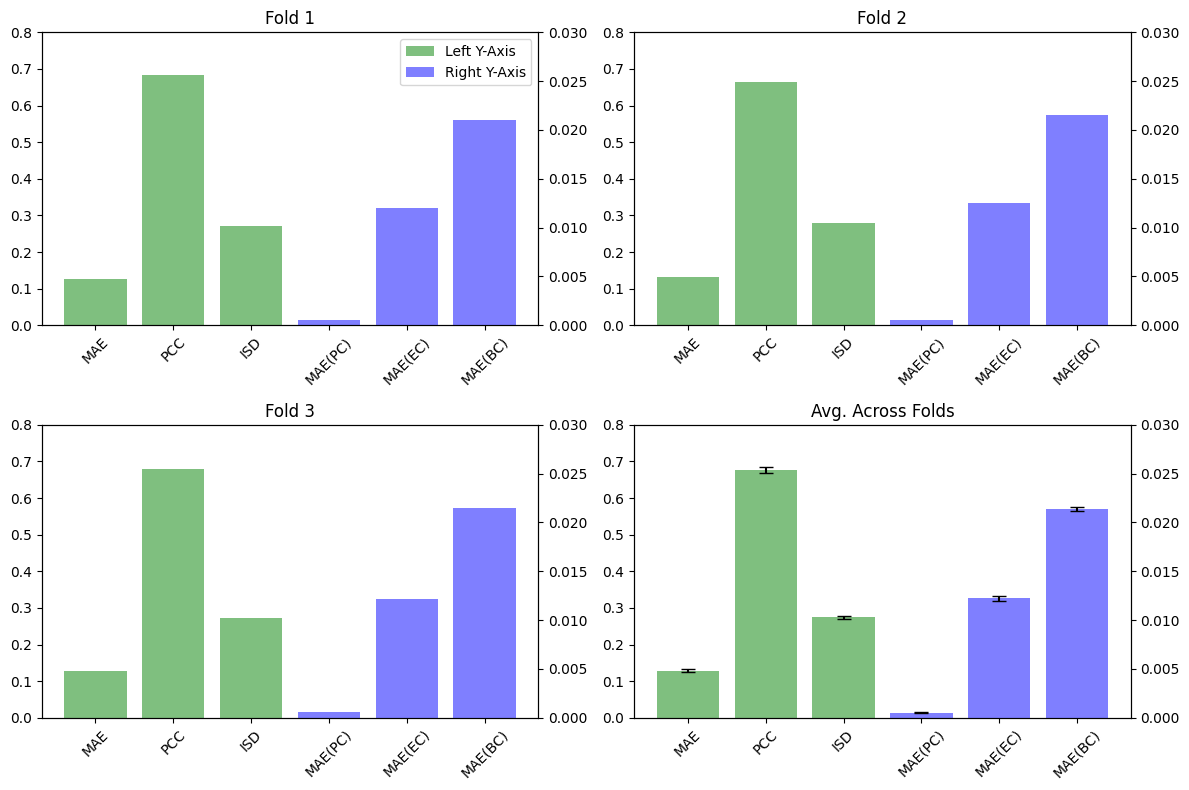

In [4]:
plot_results(data = metrics, filename = '3_fold_results.png')

## Train model on full dataset

In [9]:
from sklearn.model_selection import train_test_split
SEED = 2024

subjects_adj, subjects_ground_truth = load_matrix_data()
test_adj = load_matrix_test()
print("DATA LOADED")

# Splitting the data into training and validation sets
train_adj, val_adj, train_labels, val_labels = train_test_split(
    subjects_adj, subjects_ground_truth, test_size=0.15, random_state=SEED)

# set random numpy and torch seeds
torch.manual_seed(SEED)
np.random.seed(SEED)

# Model
model = SimpleBrainNet(args)

# Augment data
train_labels = create_discrepancy(train_labels, zero_shift=-0.05)

# Train on full dataset
train(model, train_adj, train_labels, args, val_adj=val_adj, val_labels=val_labels)

# Generate a kaggle output
outputs = compute_output_hr(args, test_adj, model)
create_submision_compatible_csv_save(outputs, 'kaggle_competition_new.csv')

DATA LOADED


/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.2155692900748963 Error:  15.257027005472928 % Validation MAE:  0.18102047
Epoch:  1 Generator Loss:  0.19071847380053067 Error:  13.48650115178832 % Validation MAE:  0.17164195
Epoch:  2 Generator Loss:  0.17882415324660902 Error:  12.944731628852532 % Validation MAE:  0.16687243
Epoch:  3 Generator Loss:  0.17143849362718297 Error:  12.698031248564416 % Validation MAE:  0.16459742
Epoch:  4 Generator Loss:  0.1649626797818123 Error:  12.399482309606903 % Validation MAE:  0.16710475
Epoch:  5 Generator Loss:  0.16132701542360564 Error:  12.277160648335801 % Validation MAE:  0.16639999
Epoch:  6 Generator Loss:  0.1579584017501655 Error:  12.084546426297925 % Validation MAE:  0.16624299
Epoch:  7 Generator Loss:  0.15628710769592447 Error:  11.991824843782059 % Validation MAE:  0.16343218
Epoch:  8 Generator Loss:  0.15351388302255184 Error:  11.763096849123638 % Validation MAE:  0.15838104
Epoch:  9 Generator Loss:  0.1510862701750816 Error:  11.55444915730

In [ ]:
validation_outputs = compute_output_hr(args, val_adj, model)

In [ ]:
plot_adjacencies(validation_outputs, val_labels)

### 3 Fold-CV final submission

In [7]:
## 3 - Fold CV
# Set seeds
SEED = 42
GET_METRICS = False
torch.manual_seed(SEED)
np.random.seed(SEED)

# Perform fold split
kf = KFold(n_splits=3, shuffle=True, random_state=SEED)

# Load Data
subjects_adj, subjects_ground_truth = load_matrix_data()
test_adj = load_matrix_test()
print("DATA LOADED")

metrics = []
models = []

# Run 3-fold CV
for i, (train_index, val_index) in enumerate(kf.split(subjects_adj)):
    print(f"Fold {i+1}:")

    # Initialise model
    model = SimpleBrainNet(args)

    train_labels = create_discrepancy(subjects_ground_truth[train_index], zero_shift = -0.05)

    # Train model
    train(model, subjects_adj[train_index], train_labels, args,
          subjects_adj[val_index], subjects_ground_truth[val_index])
    
    models.append(model)
    # Get fold metrics
    if GET_METRICS:
        results = calculate_metrics(subjects_ground_truth[val_index].detach().numpy(), validation_outputs, only_mae=False)
        metrics.append(results)

DATA LOADED
Fold 1:


/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21992792189121246 Error:  15.609722705306234 % Validation MAE:  0.17358035
Epoch:  1 Generator Loss:  0.19560470250812736 Error:  13.740863100633966 % Validation MAE:  0.16853146
Epoch:  2 Generator Loss:  0.18500015059032957 Error:  13.234191656381162 % Validation MAE:  0.16429539
Epoch:  3 Generator Loss:  0.17689019186539692 Error:  12.891797600565729 % Validation MAE:  0.16163667
Epoch:  4 Generator Loss:  0.171232393733016 Error:  12.698483406691938 % Validation MAE:  0.1603099
Epoch:  5 Generator Loss:  0.16718451047802832 Error:  12.576547325462908 % Validation MAE:  0.16096464
Epoch:  6 Generator Loss:  0.1631228969440804 Error:  12.385396820467871 % Validation MAE:  0.15825641
Epoch:  7 Generator Loss:  0.16061029616776887 Error:  12.282700252694053 % Validation MAE:  0.15869217
Epoch:  8 Generator Loss:  0.15829594876315142 Error:  12.148388408057324 % Validation MAE:  0.15539119
Epoch:  9 Generator Loss:  0.15673204853728012 Error:  12.0447306549

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21834871629336933 Error:  15.450597285955874 % Validation MAE:  0.18829514
Epoch:  1 Generator Loss:  0.19305933179619075 Error:  13.489497969816396 % Validation MAE:  0.17832384
Epoch:  2 Generator Loss:  0.1823591953730798 Error:  12.98781317902041 % Validation MAE:  0.17452554
Epoch:  3 Generator Loss:  0.17483704637836767 Error:  12.701544756287927 % Validation MAE:  0.17027122
Epoch:  4 Generator Loss:  0.1686688763601286 Error:  12.44918375133394 % Validation MAE:  0.1668373
Epoch:  5 Generator Loss:  0.1643406999809248 Error:  12.299915631343653 % Validation MAE:  0.16576715
Epoch:  6 Generator Loss:  0.1612850376614579 Error:  12.205957319285417 % Validation MAE:  0.16351727
Epoch:  7 Generator Loss:  0.15791153988322695 Error:  12.018733263552726 % Validation MAE:  0.16209781
Epoch:  8 Generator Loss:  0.15581856654570983 Error:  11.90281053921124 % Validation MAE:  0.16115272
Epoch:  9 Generator Loss:  0.15366282911451012 Error:  11.74247940112878

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21854974954788173 Error:  15.48153407472585 % Validation MAE:  0.18286416
Epoch:  1 Generator Loss:  0.19443644157477788 Error:  13.659645457352912 % Validation MAE:  0.17534833
Epoch:  2 Generator Loss:  0.18374673476708786 Error:  13.148153300530144 % Validation MAE:  0.17261565
Epoch:  3 Generator Loss:  0.1761282067745924 Error:  12.847766326740384 % Validation MAE:  0.16784735
Epoch:  4 Generator Loss:  0.1702365746189441 Error:  12.623652669468097 % Validation MAE:  0.16516134
Epoch:  5 Generator Loss:  0.165976640502257 Error:  12.474028732893723 % Validation MAE:  0.16375625
Epoch:  6 Generator Loss:  0.16252302804163524 Error:  12.33924657904676 % Validation MAE:  0.1619385
Epoch:  7 Generator Loss:  0.15945779478975705 Error:  12.18018531134086 % Validation MAE:  0.15980777
Epoch:  8 Generator Loss:  0.15667045462344373 Error:  11.992903106978961 % Validation MAE:  0.15831578
Epoch:  9 Generator Loss:  0.15534186948622977 Error:  11.91404668747314

In [8]:
# Generate a kaggle output
outputs = compute_output_hr_ensemble(args, test_adj, models)
create_submision_compatible_csv_save(outputs, 'kaggle_competition_ensembled.csv')

### 5 Fold-CV final submission

In [9]:
## 5 - Fold CV
# Set seeds
SEED = 42
GET_METRICS = False
torch.manual_seed(SEED)
np.random.seed(SEED)

# Perform fold split
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

# Load Data
subjects_adj, subjects_ground_truth = load_matrix_data()
test_adj = load_matrix_test()
print("DATA LOADED")

metrics = []
models = []

# Run 3-fold CV
for i, (train_index, val_index) in enumerate(kf.split(subjects_adj)):
    print(f"Fold {i+1}:")

    # Initialise model
    model = SimpleBrainNet(args)

    train_labels = create_discrepancy(subjects_ground_truth[train_index], zero_shift = -0.05)

    # Train model
    train(model, subjects_adj[train_index], train_labels, args,
          subjects_adj[val_index], subjects_ground_truth[val_index])
    
    models.append(model)
    # Get fold metrics
    if GET_METRICS:
        results = calculate_metrics(subjects_ground_truth[val_index].detach().numpy(), validation_outputs, only_mae=False)
        metrics.append(results)

DATA LOADED
Fold 1:


/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21608265618184455 Error:  15.277358295774102 % Validation MAE:  0.17662624
Epoch:  1 Generator Loss:  0.19133113156583972 Error:  13.476255564089106 % Validation MAE:  0.16893287
Epoch:  2 Generator Loss:  0.1802127391548085 Error:  12.991401032173544 % Validation MAE:  0.16510904
Epoch:  3 Generator Loss:  0.17254582417190523 Error:  12.719429850130155 % Validation MAE:  0.16266821
Epoch:  4 Generator Loss:  0.1664804782634391 Error:  12.47365571054301 % Validation MAE:  0.16185848
Epoch:  5 Generator Loss:  0.16179457250842474 Error:  12.265151313373021 % Validation MAE:  0.1592759
Epoch:  6 Generator Loss:  0.1586535006089318 Error:  12.11755513248587 % Validation MAE:  0.1575714
Epoch:  7 Generator Loss:  0.15618992546447238 Error:  11.96300623784388 % Validation MAE:  0.15708663
Epoch:  8 Generator Loss:  0.15363824053814537 Error:  11.760160226122778 % Validation MAE:  0.15375535
Epoch:  9 Generator Loss:  0.15196339035392703 Error:  11.62875077890274

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21760629800925577 Error:  15.438893330948694 % Validation MAE:  0.1712795
Epoch:  1 Generator Loss:  0.19163185750183306 Error:  13.523751743754051 % Validation MAE:  0.16503018
Epoch:  2 Generator Loss:  0.18023677965752163 Error:  13.013049999349995 % Validation MAE:  0.16161227
Epoch:  3 Generator Loss:  0.1721923223563603 Error:  12.695163589222988 % Validation MAE:  0.15999855
Epoch:  4 Generator Loss:  0.16695371987228108 Error:  12.528975302339497 % Validation MAE:  0.1577373
Epoch:  5 Generator Loss:  0.16281468370803318 Error:  12.367753690122662 % Validation MAE:  0.15730393
Epoch:  6 Generator Loss:  0.15962988866451092 Error:  12.217338226343456 % Validation MAE:  0.1552289
Epoch:  7 Generator Loss:  0.15714869519373528 Error:  12.061242551955962 % Validation MAE:  0.15365057
Epoch:  8 Generator Loss:  0.15528875723817295 Error:  11.926546323120146 % Validation MAE:  0.15455516
Epoch:  9 Generator Loss:  0.15312462025567106 Error:  11.7486247666

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21659709046136089 Error:  15.33838106847521 % Validation MAE:  0.17836203
Epoch:  1 Generator Loss:  0.1913999914010959 Error:  13.506394724792509 % Validation MAE:  0.17198952
Epoch:  2 Generator Loss:  0.1802093642416285 Error:  13.01028777970307 % Validation MAE:  0.1679301
Epoch:  3 Generator Loss:  0.17210723871170586 Error:  12.68484310538911 % Validation MAE:  0.16590519
Epoch:  4 Generator Loss:  0.16646664033630001 Error:  12.479507811923526 % Validation MAE:  0.1658056
Epoch:  5 Generator Loss:  0.16187509149312973 Error:  12.275124685977822 % Validation MAE:  0.16323325
Epoch:  6 Generator Loss:  0.15865565858670136 Error:  12.118082387901064 % Validation MAE:  0.16117214
Epoch:  7 Generator Loss:  0.15662083863767226 Error:  12.006209618342456 % Validation MAE:  0.1609723
Epoch:  8 Generator Loss:  0.15465269104313495 Error:  11.86080666175529 % Validation MAE:  0.15926363
Epoch:  9 Generator Loss:  0.15245748233439319 Error:  11.68026167398958 

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21744582490689718 Error:  15.418806977903666 % Validation MAE:  0.18654494
Epoch:  1 Generator Loss:  0.19212860380535696 Error:  13.544765921003782 % Validation MAE:  0.17727007
Epoch:  2 Generator Loss:  0.18021516045972483 Error:  12.985574181622534 % Validation MAE:  0.1715234
Epoch:  3 Generator Loss:  0.1715817247976118 Error:  12.619997711101574 % Validation MAE:  0.16793524
Epoch:  4 Generator Loss:  0.16531362562482035 Error:  12.363052173559346 % Validation MAE:  0.16731551
Epoch:  5 Generator Loss:  0.16106415562220475 Error:  12.19586579879718 % Validation MAE:  0.16537893
Epoch:  6 Generator Loss:  0.15756805919444383 Error:  12.012072324530402 % Validation MAE:  0.1631558
Epoch:  7 Generator Loss:  0.1554754281889147 Error:  11.892967932482264 % Validation MAE:  0.1620659
Epoch:  8 Generator Loss:  0.1531142237693516 Error:  11.710555667975056 % Validation MAE:  0.16191426
Epoch:  9 Generator Loss:  0.1513137360339734 Error:  11.56824392391674

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21578645061201124 Error:  15.254908877967008 % Validation MAE:  0.18149771
Epoch:  1 Generator Loss:  0.19162290142988092 Error:  13.515257373896997 % Validation MAE:  0.17284968
Epoch:  2 Generator Loss:  0.1802248516634329 Error:  13.002098501840633 % Validation MAE:  0.1684271
Epoch:  3 Generator Loss:  0.17170254730466586 Error:  12.647037458286356 % Validation MAE:  0.16499412
Epoch:  4 Generator Loss:  0.16616976605867273 Error:  12.455834214811896 % Validation MAE:  0.16346964
Epoch:  5 Generator Loss:  0.16197188732339374 Error:  12.287007060958379 % Validation MAE:  0.16034055
Epoch:  6 Generator Loss:  0.15897684944654578 Error:  12.15092512542632 % Validation MAE:  0.15943293
Epoch:  7 Generator Loss:  0.15652449929447315 Error:  11.99588333604051 % Validation MAE:  0.15817839
Epoch:  8 Generator Loss:  0.1549669239503234 Error:  11.890289687843465 % Validation MAE:  0.15373366
Epoch:  9 Generator Loss:  0.15282227321347194 Error:  11.71197248483

In [10]:
# Generate a kaggle output
outputs = compute_output_hr_ensemble(args, test_adj, models)
create_submision_compatible_csv_save(outputs, 'kaggle_competition_ensembled_5fold.csv')

### 4 Fold-CV final submission

In [ ]:
import argparse
class Args(argparse.Namespace):
    epochs = 200
    lr = 0.0001
    lmbda = 0.1
    lr_dim = 160
    hr_dim = 320
    hidden_dim = 640
    padding = 26
    double_convolution = True
    dropout = 0.1
    weight_decay = 0
    
    
# import argparse
# class Args(argparse.Namespace):
#     epochs = 1
#     lr = 0.0004
#     lmbda = 0.3
#     lr_dim = 160
#     hr_dim = 320
#     hidden_dim = 1280
#     padding = 26
#     mean_dense = 0.
#     std_dense = 0.01
#     mean_gaussian = 0.
#     std_gaussian = 0.1


args = Args()

In [ ]:
## 4 - Fold CV
# Set seeds
SEED = 42
GET_METRICS = False
torch.manual_seed(SEED)
np.random.seed(SEED)

# Perform fold split
kf = KFold(n_splits=4, shuffle=True, random_state=SEED)

# Load Data
subjects_adj, subjects_ground_truth = load_matrix_data()
test_adj = load_matrix_test()
print("DATA LOADED")

metrics = []
models = []

# Run 4-fold CV
for i, (train_index, val_index) in enumerate(kf.split(subjects_adj)):
    print(f"Fold {i+1}:")

    # Initialise model
    model = SimpleBrainNet(args)

    train_labels = create_discrepancy(subjects_ground_truth[train_index], zero_shift = -0.05)

    # Train model
    train(model, subjects_adj[train_index], train_labels, args,
          subjects_adj[val_index], subjects_ground_truth[val_index])
    
    models.append(model)
    # Get fold metrics
    if GET_METRICS:
        results = calculate_metrics(subjects_ground_truth[val_index].detach().numpy(), validation_outputs, only_mae=False)
        metrics.append(results)

DATA LOADED
Fold 1:


/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21608265618184455 Error:  15.277358295774102 % Validation MAE:  0.17662624
Epoch:  1 Generator Loss:  0.19133113156583972 Error:  13.476255564089106 % Validation MAE:  0.16893287
Epoch:  2 Generator Loss:  0.1802127391548085 Error:  12.991401032173544 % Validation MAE:  0.16510904
Epoch:  3 Generator Loss:  0.17254582417190523 Error:  12.719429850130155 % Validation MAE:  0.16266821
Epoch:  4 Generator Loss:  0.1664804782634391 Error:  12.47365571054301 % Validation MAE:  0.16185848
Epoch:  5 Generator Loss:  0.16179457250842474 Error:  12.265151313373021 % Validation MAE:  0.1592759
Epoch:  6 Generator Loss:  0.1586535006089318 Error:  12.11755513248587 % Validation MAE:  0.1575714
Epoch:  7 Generator Loss:  0.15618992546447238 Error:  11.96300623784388 % Validation MAE:  0.15708663
Epoch:  8 Generator Loss:  0.15363824053814537 Error:  11.760160226122778 % Validation MAE:  0.15375535
Epoch:  9 Generator Loss:  0.15196339035392703 Error:  11.62875077890274

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21760629800925577 Error:  15.438893330948694 % Validation MAE:  0.1712795
Epoch:  1 Generator Loss:  0.19163185750183306 Error:  13.523751743754051 % Validation MAE:  0.16503018
Epoch:  2 Generator Loss:  0.18023677965752163 Error:  13.013049999349995 % Validation MAE:  0.16161227
Epoch:  3 Generator Loss:  0.1721923223563603 Error:  12.695163589222988 % Validation MAE:  0.15999855
Epoch:  4 Generator Loss:  0.16695371987228108 Error:  12.528975302339497 % Validation MAE:  0.1577373
Epoch:  5 Generator Loss:  0.16281468370803318 Error:  12.367753690122662 % Validation MAE:  0.15730393
Epoch:  6 Generator Loss:  0.15962988866451092 Error:  12.217338226343456 % Validation MAE:  0.1552289
Epoch:  7 Generator Loss:  0.15714869519373528 Error:  12.061242551955962 % Validation MAE:  0.15365057
Epoch:  8 Generator Loss:  0.15528875723817295 Error:  11.926546323120146 % Validation MAE:  0.15455516
Epoch:  9 Generator Loss:  0.15312462025567106 Error:  11.7486247666

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21659709046136089 Error:  15.33838106847521 % Validation MAE:  0.17836203
Epoch:  1 Generator Loss:  0.1913999914010959 Error:  13.506394724792509 % Validation MAE:  0.17198952
Epoch:  2 Generator Loss:  0.1802093642416285 Error:  13.01028777970307 % Validation MAE:  0.1679301
Epoch:  3 Generator Loss:  0.17210723871170586 Error:  12.68484310538911 % Validation MAE:  0.16590519
Epoch:  4 Generator Loss:  0.16646664033630001 Error:  12.479507811923526 % Validation MAE:  0.1658056
Epoch:  5 Generator Loss:  0.16187509149312973 Error:  12.275124685977822 % Validation MAE:  0.16323325
Epoch:  6 Generator Loss:  0.15865565858670136 Error:  12.118082387901064 % Validation MAE:  0.16117214
Epoch:  7 Generator Loss:  0.15662083863767226 Error:  12.006209618342456 % Validation MAE:  0.1609723
Epoch:  8 Generator Loss:  0.15465269104313495 Error:  11.86080666175529 % Validation MAE:  0.15926363
Epoch:  9 Generator Loss:  0.15245748233439319 Error:  11.68026167398958 

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21744582490689718 Error:  15.418806977903666 % Validation MAE:  0.18654494
Epoch:  1 Generator Loss:  0.19212860380535696 Error:  13.544765921003782 % Validation MAE:  0.17727007
Epoch:  2 Generator Loss:  0.18021516045972483 Error:  12.985574181622534 % Validation MAE:  0.1715234
Epoch:  3 Generator Loss:  0.1715817247976118 Error:  12.619997711101574 % Validation MAE:  0.16793524
Epoch:  4 Generator Loss:  0.16531362562482035 Error:  12.363052173559346 % Validation MAE:  0.16731551
Epoch:  5 Generator Loss:  0.16106415562220475 Error:  12.19586579879718 % Validation MAE:  0.16537893
Epoch:  6 Generator Loss:  0.15756805919444383 Error:  12.012072324530402 % Validation MAE:  0.1631558
Epoch:  7 Generator Loss:  0.1554754281889147 Error:  11.892967932482264 % Validation MAE:  0.1620659
Epoch:  8 Generator Loss:  0.1531142237693516 Error:  11.710555667975056 % Validation MAE:  0.16191426
Epoch:  9 Generator Loss:  0.1513137360339734 Error:  11.56824392391674

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21578645061201124 Error:  15.254908877967008 % Validation MAE:  0.18149771
Epoch:  1 Generator Loss:  0.19162290142988092 Error:  13.515257373896997 % Validation MAE:  0.17284968
Epoch:  2 Generator Loss:  0.1802248516634329 Error:  13.002098501840633 % Validation MAE:  0.1684271
Epoch:  3 Generator Loss:  0.17170254730466586 Error:  12.647037458286356 % Validation MAE:  0.16499412
Epoch:  4 Generator Loss:  0.16616976605867273 Error:  12.455834214811896 % Validation MAE:  0.16346964
Epoch:  5 Generator Loss:  0.16197188732339374 Error:  12.287007060958379 % Validation MAE:  0.16034055
Epoch:  6 Generator Loss:  0.15897684944654578 Error:  12.15092512542632 % Validation MAE:  0.15943293
Epoch:  7 Generator Loss:  0.15652449929447315 Error:  11.99588333604051 % Validation MAE:  0.15817839
Epoch:  8 Generator Loss:  0.1549669239503234 Error:  11.890289687843465 % Validation MAE:  0.15373366
Epoch:  9 Generator Loss:  0.15282227321347194 Error:  11.71197248483

In [ ]:
# Generate a kaggle output
outputs = compute_output_hr_ensemble(args, test_adj, models)
create_submision_compatible_csv_save(outputs, 'kaggle_competition_ensembled_4fold.csv')